In [ ]:
import requests

In [4]:
import warnings
warnings.filterwarnings("ignore") 

## Keras related modules
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Sklearn related modules
from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Plot related modules
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import numpy as np
import pandas as pd

random_seed = 100
np.random.seed(random_seed)

In [5]:
## look data with pandas
train_file = "/content/rupturemodel_train.txt"
val_file = "/content/rupturemodel_validate.txt"
test_file = "/content/rupturemodel_test.txt"

df_train= pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

features_name =  ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'label']
df_train.columns = features_name
df_val.columns = features_name
df_test.columns = features_name

df_train_all = df_train.append(df_val)

FileNotFoundError: ignored

In [ ]:
df_train_all.to_csv('/content/rupture_data.csv')

In [ ]:
df_train_all['mus'] = df_train_all.sdrop + df_train_all.mud
#mus stands for static friction coefficient
#mud stands for dynamic friction coefficient
#sdrop is difference between mus and mud.
#dc is critical slip distance
#sxx and syy is noraml stress
#sxy is shear stress.

In [1]:
df_train

NameError: ignored

In [3]:
df = shuffle(df_train_all, random_state = random_seed)
df_train = shuffle(df_train, random_state = random_seed)
df_val = shuffle(df_val, random_state = random_seed)
df_test = shuffle(df_test, random_state = random_seed)





mms = StandardScaler()
train_scale = mms.fit(df.drop(['mus','label'], axis=1))

xtrain_all = train_scale.transform(df.drop(['mus','label'], axis=1))
ytrain_all =  df['label'].values

xtrain = train_scale.transform(df_train.drop('label', axis=1))
ytrain = df_train['label'].values

xval = train_scale.transform(df_val.drop('label', axis=1))
yval = df_val['label'].values

xtest = train_scale.transform(df_test.drop('label', axis=1))
ytest = df_test['label'].values






NameError: ignored

In [ ]:
df
#A dynamic rupture model solves the elastodynamic wave equation coupled to a friction law describing the failure process. 
#The simulation dynamically determines fault slip based on the initial stress conditions, 
#the elastodynamic wave equations, and frictional failure on that fault.



,height,width,sxx,sxy,syy,sdrop,mud,dc,label,mus
249,0.014233,1.101347,-60.014833,20.013391,-51.428304,0.333531,0.429068,0.415945,1.0,0.762599
353,0.164179,1.949207,-134.249666,76.749908,-130.991948,0.570002,0.223035,0.428726,0.0,0.793037
137,0.014026,1.425086,-82.280057,44.550212,-84.186704,0.513257,0.212235,0.347598,0.0,0.725492
24,0.091522,1.252381,-19.206666,10.245012,-19.652604,0.497355,0.265979,0.395737,0.0,0.763334
164,0.096962,1.324834,-120.344968,56.463537,-101.811857,0.524854,0.254975,0.414538,0.0,0.779829
...,...,...,...,...,...,...,...,...,...,...
455,0.074289,1.666500,-98.122740,26.690289,-96.862590,0.239055,0.348578,0.320590,1.0,0.587633
471,0.052215,1.163585,-76.587672,42.318422,-102.068846,0.372793,0.423874,0.501629,1.0,0.796667
435,0.018864,1.417327,-33.291427,15.230760,-30.501968,0.481119,0.262258,0.317233,0.0,0.743377
392,0.116155,1.555487,-190.370799,39.202927,-158.699223,0.202685,0.387605,0.420692,1.0,0.590290


In [ ]:
df_train_new = pd.DataFrame(xtrain, columns= features_name[:-1])
df_train_new['label'] = df_train['label']

In [ ]:
df_train_all.describe()

,height,width,sxx,sxy,syy,sdrop,mud,dc,label,mus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.072723,1.491288,-85.229294,36.104839,-85.038262,0.398414,0.303045,0.401455,0.331000,0.701459
std,0.045815,0.288715,44.806170,20.786125,42.237820,0.114731,0.087087,0.050511,0.470809,0.086695
min,0.000003,1.000323,-198.643591,2.388038,-159.910639,0.200696,0.200052,0.233045,0.000000,0.416905
25%,0.033198,1.242035,-119.816427,19.315241,-119.845931,0.302889,0.229019,0.364779,0.000000,0.648668
50%,0.070084,1.483612,-81.396153,33.705601,-83.879933,0.396534,0.282629,0.402385,0.000000,0.729217
75%,0.105252,1.734952,-49.531267,50.085089,-49.204282,0.496700,0.357554,0.434716,1.000000,0.771914
max,0.186217,2.128935,-8.065657,97.618207,-10.011991,0.599812,0.563655,0.552184,1.000000,0.799999


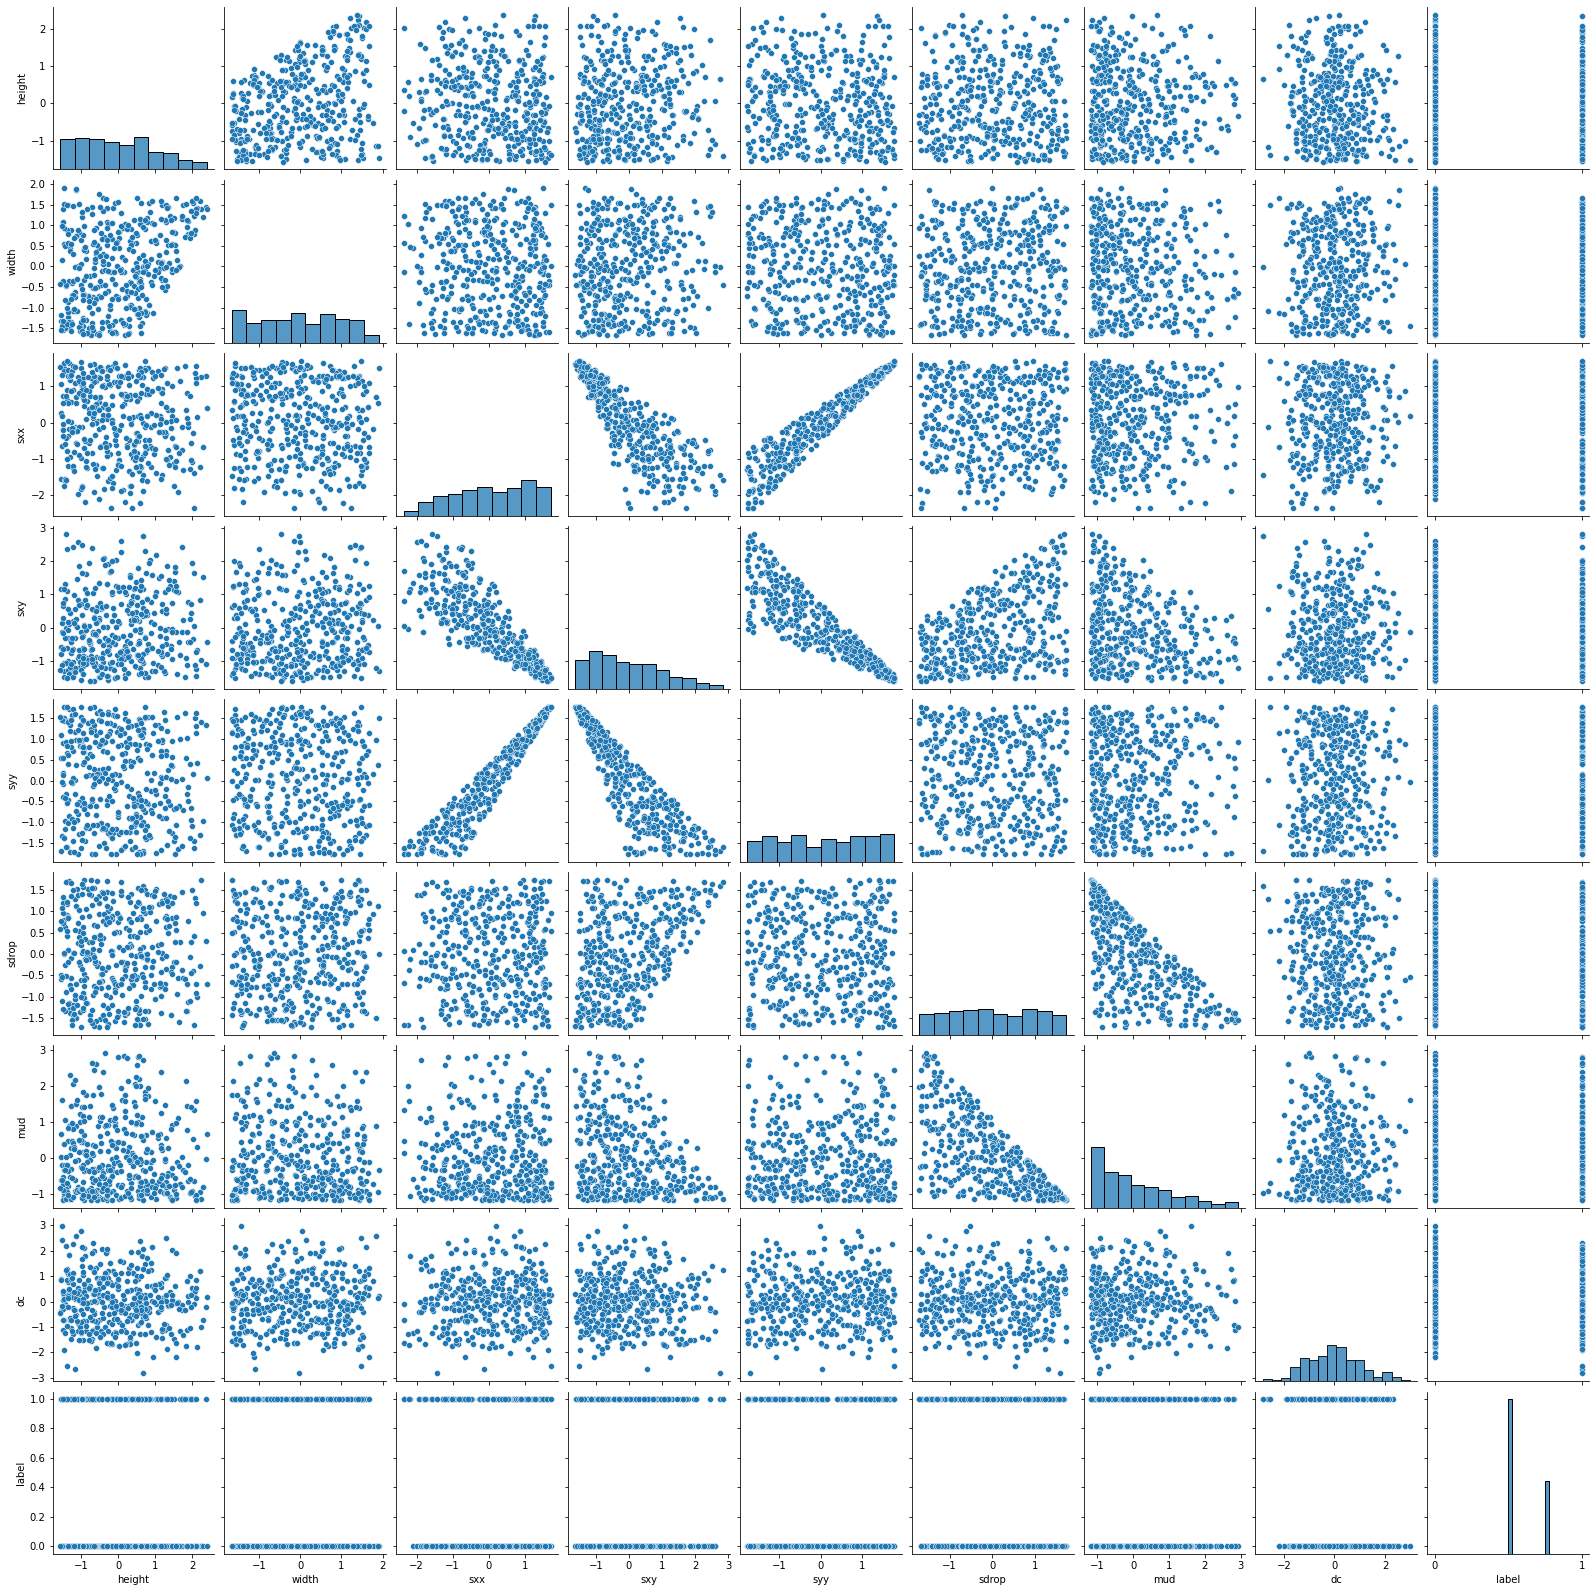

In [ ]:
 g = sns.pairplot(df_train_new, markers=["o", "s"])
 plt.xticks([-2, -1, 0, 1, 2])
plt.show()

In [ ]:
df_train_all.head()

,height,width,sxx,sxy,syy,sdrop,mud,dc,label,mus
0,0.084547,1.016564,-23.624739,7.926345,-24.486907,0.253774,0.489193,0.387784,0.0,0.742967
1,0.133802,1.905841,-70.112562,35.129808,-74.528445,0.455147,0.326099,0.395609,0.0,0.781246
2,0.042798,1.661430,-73.827984,42.289211,-88.663554,0.443221,0.269041,0.459746,1.0,0.712262
3,0.046067,1.015606,-151.415137,48.831351,-129.837482,0.364975,0.273434,0.351767,0.0,0.638409
4,0.138869,1.730883,-68.995099,33.513041,-61.084463,0.535676,0.200819,0.415214,0.0,0.736495


In [ ]:
tau_s = df_train_all.mus * df_train_all.syy
tau_d = df_train_all.mud * df_train_all.syy
tau_i = df_train_all.sxy
df_train_all['sfactor'] = (tau_s - tau_i)/(tau_i - tau_d)

In [ ]:
df1 = df_train_all[df_train_all['label']==0]['sfactor']
df2 = df_train_all[df_train_all['label']==1]['sfactor']

df2.index = range(331)
df1.index = range(669)


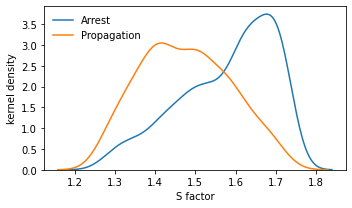

In [ ]:
plt.figure(figsize=(5, 3))
sns.kdeplot(abs(df1), shade= False)
sns.kdeplot(abs(df2), shade= False)
plt.legend(['Arrest', 'Propagation'], 
           loc = 'upper left',
           framealpha = 0.0)

plt.xlabel('S factor')
plt.ylabel('kernel density')
plt.tight_layout()

plt.show()
#this basically tells us that if the sfactor is high then rupture won't be propagating.

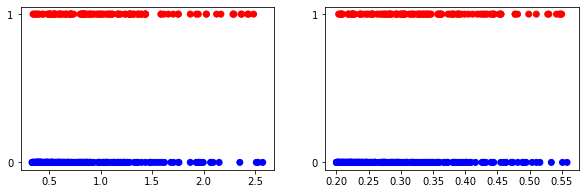

In [ ]:
plt.figure(figsize = (10, 3))
plt.subplot(1,2, 1)
plt.scatter(df_train['mud']/df_train['sdrop'], df_train['label'], c = df_train['label'], cmap = 'bwr')
plt.yticks([0,1])
plt.grid(False)

plt.subplot(1,2, 2)
plt.scatter(df_train['mud'], df_train['label'], c = df_train['label'], cmap = 'bwr')
plt.yticks([0,1])
plt.grid(False)
plt.show()

In [ ]:
label_count = df_train_all.groupby('label', as_index = False).count()
class_name = ['Rupture arrest', 'Rupture propagate']
count = list(label_count['height'])
print('Rupture propagate : {}, \nRupture arrest: {}'.format(count[0], count[1]))
print('Total number of data: {}'.format(np.sum(count)))
print('Class ratio for rupture propagation: {}'.format(count[0]/count[1]))

Rupture propagate : 669, 
Rupture arrest: 331
Total number of data: 1000
Class ratio for rupture propagation: 2.0211480362537766


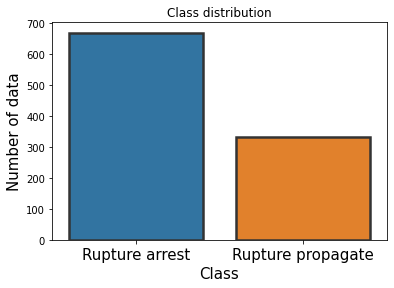

In [ ]:
index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x = class_name, y = count, linewidth = 2.5, errcolor = ".2", edgecolor = ".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()


In [ ]:
###aa = class_weight.compute_class_weight('balanced', np.unique(ytrain_all.astype(int)), ytrain_all.astype(int))
###CLASS_WEIGHT = {0 : aa[0] , 1: aa[1]}

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(ytrain_all),
                                        y = ytrain_all                                                    
                                    )
class_weights = dict(zip(np.unique(ytrain_all), class_weights))
class_weights

NameError: ignored

In [ ]:
print(class_weights)


{0.0: 0.7473841554559043, 1.0: 1.5105740181268883}


In [ ]:
HIDDEN_LAYER_SIZE = 12
L2_REGULARIZER = 5
LEARNING_RATE = 0.0025
TRAINING_EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.30
CLASS_WEIGHT = class_weights

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(HIDDEN_LAYER_SIZE, 
                activation = 'relu',
                kernel_initializer = initializers.RandomNormal(mean = 0.0, stddev = 1, seed = 100),
                bias_initializer = 'Ones',
                input_shape = (8,),
                kernel_regularizer = regularizers.l2(L2_REGULARIZER),
                name = 'layer_1'))

adm_optz = tf.keras.optimizers.Adam(learning_rate = 0.0025)

model.add(Dense(1, activation = "sigmoid", name = 'Output_layer'))
model.compile(optimizer = adm_optz, loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# filepath = './logs/random_seed_'+ str(random_seed) +'_{epoch:02d}.hdf5'
# checkpoint = ModelCheckpoint(filepath, verbose = 0, period = 20)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20)
              
callback_list = [early_stopping]

history = model.fit(xtrain_all, ytrain_all, 
                    batch_size = BATCH_SIZE, 
                    epochs = TRAINING_EPOCHS,
                    class_weight = CLASS_WEIGHT,
                    callbacks = callback_list,
                    validation_split = VALIDATION_SPLIT, 
                    verbose = 0, validation_data=df_val)

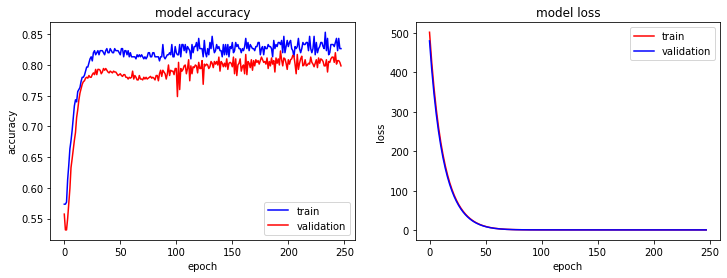

In [ ]:
plt.figure(figsize= (12, 4))
# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], 'b-')
plt.plot(history.history['accuracy'], 'r-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

# summarize history for lovass
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
ypred_train = model.predict(xtrain_all)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score = roc_auc_score(ytrain_all, ypred_train)
fpr, tpr, thresholds = roc_curve(ytrain_all, ypred_train, pos_label = 1)

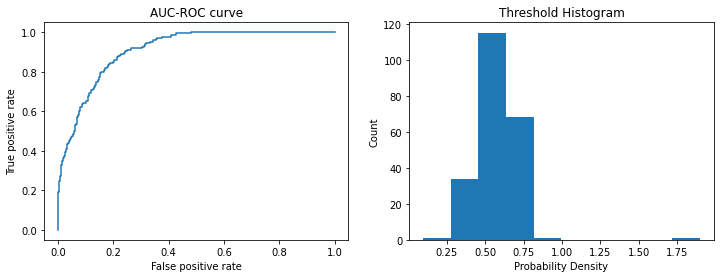

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2, 1)
plt.plot(fpr, tpr)
plt.title('AUC-ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.subplot(1, 2, 2)
plt.hist(thresholds)
plt.title('Threshold Histogram')
plt.xlabel('Probability Density')
plt.ylabel('Count')
plt.show()

In [ ]:
def prediction(xdata, ydata, threshold = 0.50):
    ypred_test_prob = model.predict(xdata)
    ypred_bin = [1.0 if val > threshold  else 0.0 for val in ypred_test_prob]
    print('Accuracy of the model: {}\n'.format(accuracy_score(ydata, ypred_bin)))
    print('Classification report: \n{}\n'.format(classification_report(ydata, ypred_bin)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ydata, ypred_bin)))
    return ypred_bin

In [ ]:
THRESHOLD = np.median(thresholds)
print(THRESHOLD)

0.5629629


In [ ]:
prediction(xtrain_all, ytrain_all, threshold = THRESHOLD)

Accuracy of the model: 0.82

Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       669
         1.0       0.73      0.72      0.73       331

    accuracy                           0.82      1000
   macro avg       0.80      0.79      0.80      1000
weighted avg       0.82      0.82      0.82      1000


Confusion matrix: 
[[582  87]
 [ 93 238]]



[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0

In [ ]:
prediction(xtest, ytest, threshold = 0.50)

Accuracy of the model: 0.8

Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       272
         1.0       0.64      0.84      0.73       128

    accuracy                           0.80       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.83      0.80      0.81       400


Confusion matrix: 
[[212  60]
 [ 20 108]]



[1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0

In [ ]:
filename = 'sample_data/rupture_best_model.h5'
model.save(filename)

In [ ]:
model_weights = []
filename = 'sample_data/rupture_best_model.h5'

loaded_model = load_model(filename)

weights = loaded_model.get_weights()

layer_1_weights = weights[0]    
layer_2_weights = weights[2]

In [ ]:
loaded_test_prob = loaded_model.predict(xtest)
ypred_bin = [1.0 if val > 0.5  else 0.0 for val in loaded_test_prob]
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_bin)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_bin)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_bin)))

Accuracy of the model: 0.8

Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       272
         1.0       0.64      0.84      0.73       128

    accuracy                           0.80       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.83      0.80      0.81       400


Confusion matrix: 
[[212  60]
 [ 20 108]]



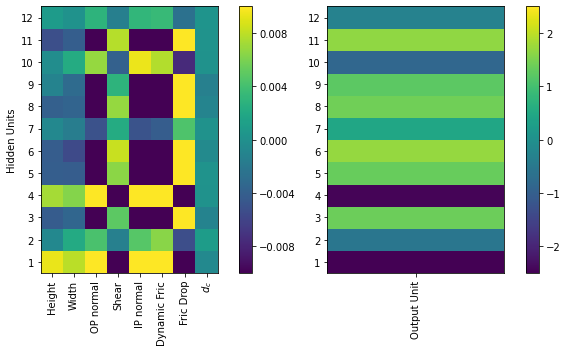

In [ ]:
# %matplotlib notebook

from matplotlib import ticker

plt.figure(figsize=(8, 5))

plt.subplot(1,2, 1)
aa = np.transpose(layer_1_weights)
plt.pcolormesh(aa, cmap = 'viridis', vmin = -0.010, vmax = 0.010)
labels = ['Height', 'Width', 'OP normal', 'Shear', 'IP normal', 'Dynamic Fric', 'Fric Drop', '$d_c$']

plt.xticks([0.5+float(x) for x in range(0,8)], labels, rotation='vertical')
plt.yticks([0.5+float(x) for x in range(0,12)], list(range(1,13)))
plt.ylabel('Hidden Units')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

cb = plt.colorbar(orientation="vertical",fraction=0.07, pad=0.1)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

# Layer two plot
plt.subplot(1, 2, 2)
bb = np.reshape(layer_2_weights, (12, 1))
plt.pcolormesh(bb, cmap = 'viridis', vmin = -2.5, vmax = 2.5)
plt.xticks([0.5],['Output Unit'],rotation='vertical')
plt.yticks([0.5+float(x) for x in range(0,12)], list(range(1,13)))
cb = plt.colorbar(orientation="vertical",fraction=0.07, pad=0.1)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

plt.tight_layout()
plt.savefig('weight_vs_features.eps')
plt.show()